<a href="https://colab.research.google.com/github/SchulzeEdi/ProjetosIA/blob/main/previsao_populacao_rede_neural_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [ ]:
df = pd.read_csv('POP.csv')

In [ ]:
df

,realtime_start,value,date,realtime_end
0,2019-12-06,156309.000,1952-01-01,2019-12-06
1,2019-12-06,156527.000,1952-02-01,2019-12-06
2,2019-12-06,156731.000,1952-03-01,2019-12-06
3,2019-12-06,156943.000,1952-04-01,2019-12-06
4,2019-12-06,157140.000,1952-05-01,2019-12-06
...,...,...,...,...
811,2019-12-06,329591.333,2019-08-01,2019-12-06
812,2019-12-06,329785.872,2019-09-01,2019-12-06
813,2019-12-06,329982.035,2019-10-01,2019-12-06
814,2019-12-06,330154.949,2019-11-01,2019-12-06


In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

realtime_start            object
value                    float64
date              datetime64[ns]
realtime_end              object
dtype: object

<Axes: xlabel='date', ylabel='value'>

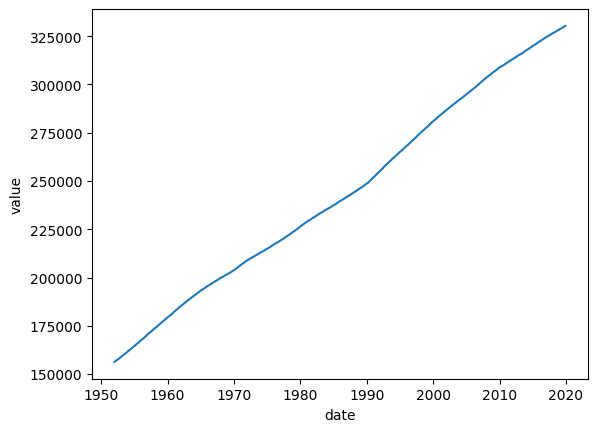

In [ ]:
sns.lineplot(x='date', y='value', data=df)


In [ ]:
alvo = df['value'].to_numpy()
len(alvo)

816

In [ ]:
#Pega a variavel alvo(do qual é o value)
#realiza um for baseado num timestamp settado, com o tamanho do dataframe(lenght)
#cria as variáveis de treino x e y alocados em um array

x_train, y_train = [], []
timestamp = 1
alvo = df['value'].to_numpy()


length = len(alvo)
for i in range(timestamp, length):
    x_train.append(alvo[i-timestamp:i])
    y_train.append(alvo[i])

x = np.array(x_train)
y = np.array(y_train)

In [ ]:
print(x[0])
print('\n')
print(y[0])

[156309.]


156527.0


In [ ]:
minMax = MinMaxScaler()

In [ ]:
#escalonar o x
x_shape = x.shape
x_escalonado = minMax.fit_transform(x)
x_escalonado[0]

array([0.])

In [ ]:
#escalonar o y
y_escalonado = minMax.fit_transform(y.reshape(-1,1))
y_escalonado[0:10]


array([[0.        ],
       [0.00117388],
       [0.00239379],
       [0.00352739],
       [0.00469551],
       [0.00590392],
       [0.00731372],
       [0.00878107],
       [0.01023691],
       [0.01107128]])

In [ ]:
#Para treino recebe 80% dos dados
#Para teste recebe os outros 20%

train = int(len(x_escalonado) * 0.8)

x_train = x_escalonado[0:train]
y_train = y_escalonado[0:train]

x_test = x_escalonado[train: len(x_escalonado)]
y_test = y_escalonado[train: len(x_escalonado)]

Text(0.5, 0, 'Data')

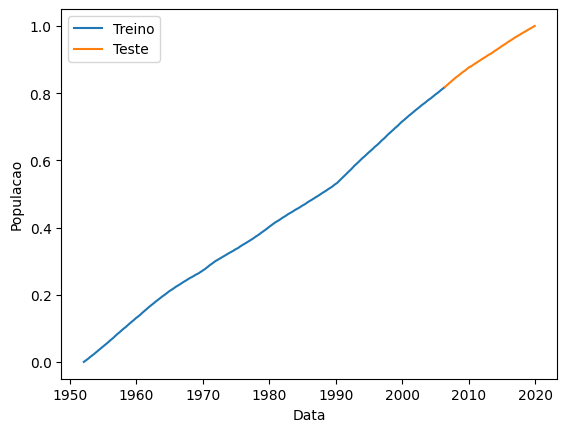

In [ ]:
sns.lineplot(x=df['date'].iloc[timestamp:len(y_train) + timestamp], y=y_train[:,0], label='Treino')
sns.lineplot(x=df['date'].iloc[len(y_train) + timestamp:], y=y_test[:,0], label='Teste')
plt.ylabel('Populacao')
plt.xlabel('Data')

In [ ]:
print("X_train: ", x_train.shape)
print("y_train: ", y_train.shape)
print("X_test : ", x_test.shape)
print("y_test : ", y_test.shape)

X_train:  (652, 1)
y_train:  (652, 1)
X_test :  (163, 1)
y_test :  (163, 1)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(652, 1)
(163, 1)


In [ ]:
model = Sequential()

model.add(LSTM(units= 120, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=1, verbose=2)

Epoch 1/25
652/652 - 2s - loss: 0.0182 - 2s/epoch - 3ms/step
Epoch 2/25
652/652 - 1s - loss: 7.8187e-04 - 705ms/epoch - 1ms/step
Epoch 3/25
652/652 - 1s - loss: 7.5837e-04 - 716ms/epoch - 1ms/step
Epoch 4/25
652/652 - 1s - loss: 7.0337e-04 - 693ms/epoch - 1ms/step
Epoch 5/25
652/652 - 1s - loss: 6.0704e-04 - 689ms/epoch - 1ms/step
Epoch 6/25
652/652 - 1s - loss: 5.7817e-04 - 693ms/epoch - 1ms/step
Epoch 7/25
652/652 - 1s - loss: 6.3911e-04 - 691ms/epoch - 1ms/step
Epoch 8/25
652/652 - 1s - loss: 5.2932e-04 - 686ms/epoch - 1ms/step
Epoch 9/25
652/652 - 1s - loss: 4.4085e-04 - 727ms/epoch - 1ms/step
Epoch 10/25
652/652 - 1s - loss: 4.7205e-04 - 693ms/epoch - 1ms/step
Epoch 11/25
652/652 - 1s - loss: 3.7514e-04 - 684ms/epoch - 1ms/step
Epoch 12/25
652/652 - 1s - loss: 4.2645e-04 - 693ms/epoch - 1ms/step
Epoch 13/25
652/652 - 1s - loss: 3.3529e-04 - 698ms/epoch - 1ms/step
Epoch 14/25
652/652 - 1s - loss: 3.2146e-04 - 687ms/epoch - 1ms/step
Epoch 15/25
652/652 - 1s - loss: 3.4504e-04 - 678m

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(163, 1, 1)

In [ ]:
x_test.shape

(163, 1, 1)

In [ ]:
y_predicted = model.predict(x_test)
y_predicted = np.reshape(y_predicted, (y_predicted.shape[0], y_predicted.shape[1]))
predicted_value = minMax.inverse_transform(y_predicted)

6/6 [==============================] - 0s 1ms/step


In [ ]:
y_test = y_test = y[train: len(x)]

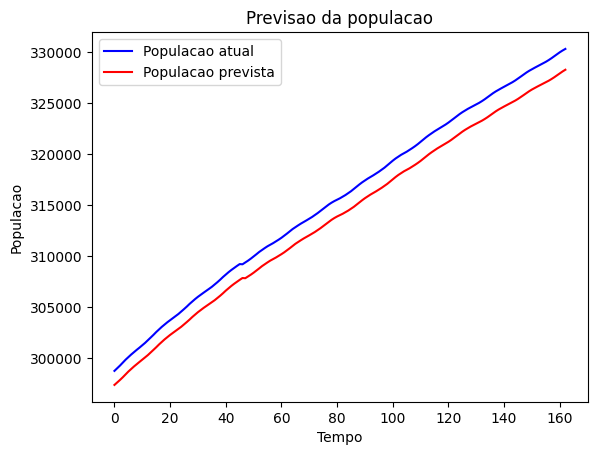

In [ ]:
plt.plot(y_test, color='blue', label='Populacao atual')
plt.plot(predicted_value, color='red', label='Populacao prevista')
plt.title('Previsao da populacao')
plt.xlabel('Tempo')
plt.ylabel('Populacao')
plt.legend()
plt.show()

In [ ]:
import joblib
filename = "previsao_populacao_com_rede.sav"
joblib.dump(model, filename)

['previsao_populacao_com_rede.sav']